In [2]:
using JLD2
using LinearAlgebra
using Plots
using LatticeAlgorithms

In [3]:
check_if_nan(num) = num <= 0 ? NaN : num

"""
    find_best_achievalble_rate(c_list, σrange, drange, num_modes_range)

Return the best achievable rate for a given σ for a range of distance

Args:
    c_list: The coherent information for a set of (d,σ)
    σrange: The range of σ
    drange: The range of d
    num_modes_range: The range of number of modes

Returns:
    ds: The optimal distance for each σ
    cs: The optimal achievable rate for each σ

Notes: The achievable rate is max(0, coherent-information divided by the number of modes)
"""    
function find_best_achievalble_rate(c_list, σrange, drange, num_modes_range)
    ds = Dict()
    cs = Dict()
    
    for σ in σrange
        c_list_2 = Dict(d => c_list[[σ, d]] for d in drange)
        c_list_3 = check_if_nan.(collect(values(sort(c_list_2))) ./ num_modes_range)
        c_list_3[isnan.(c_list_3)] .= -Inf
        if c_list_3 == [-Inf for _ in c_list_3]
            ds[σ] = NaN
            cs[σ] = NaN
        else
            dind = findmax(c_list_3)[2]
            d = drange[dind]
            ds[σ] = d
            cs[σ] = c_list_3[dind]
        end
    end    
    return ds, cs
end

find_best_achievalble_rate

# Load data

In [4]:
###################### surf-sq ######################
data_surf_sq = load("data/bsv_surface_square_3_39_10016000.jld2")
c_list_surf_sq = data_surf_sq["c_list"]
drange_surf_sq = data_surf_sq["drange"]
σrange_surf_sq = data_surf_sq["σrange"]

num_modes_range_surf_sq = drange_surf_sq.^2
ds_surf_sq, cs_surf_sq = find_best_achievalble_rate(
    c_list_surf_sq, σrange_surf_sq, drange_surf_sq, num_modes_range_surf_sq
) 
###################### surf-sq ######################

###################### 513-hex ######################
data_513_hex = load("data/mld_513_hex_0.5_0.6_10002496.jld2")
σrange_513_hex = data_513_hex["σrange"]
c_list_513_hex = Dict()
for σ in σrange_513_hex
    c_list_513_hex[[σ, 3.0]] = data_513_hex["c_list"][σ]
end
ds_513_hex, cs_513_hex = find_best_achievalble_rate(
    c_list_513_hex, σrange_513_hex, [3], [5]
) ;
###################### 513-hex ######################


###################### color-hex ######################
data_color_hex = load("data/tn_color_hexagonal_3_21_64_10016000.jld2")
c_list_color_hex = data_color_hex["c_list"]
drange_color_hex = data_color_hex["drange"]
σrange_color_hex = data_color_hex["σrange"]

num_modes_range_color_hex = triangular_color_code_num_qubits.(drange_color_hex)
ds_color_hex, cs_color_hex = find_best_achievalble_rate(
    c_list_color_hex, σrange_color_hex, drange_color_hex, num_modes_range_color_hex
) 
###################### color-hex ######################

###################### color-square ######################
data_color_square = load("data/tn_color_square_3_21_128_10016000.jld2")
c_list_color_square = data_color_square["c_list"]
drange_color_square = data_color_square["drange"]
σrange_color_square = data_color_square["σrange"]

num_modes_range_color_square = triangular_color_code_num_qubits.(drange_color_square)
ds_color_square, cs_color_square = find_best_achievalble_rate(
    c_list_color_square, σrange_color_square, drange_color_square, num_modes_range_color_square
) 
###################### color-square ######################


(Dict{Any, Any}(0.592 => 21, 0.54 => 1, 0.594 => 21, 0.604 => NaN, 0.591 => 21, 0.51 => 1, 0.603 => NaN, 0.596 => NaN, 0.593 => 21, 0.58 => 11…), Dict{Any, Any}(0.592 => 0.00021594839916760385, 0.54 => 0.05726154518666782, 0.594 => 6.522856336510441e-5, 0.604 => NaN, 0.591 => 0.00029110327640033363, 0.51 => 0.17992341102313536, 0.603 => NaN, 0.596 => NaN, 0.593 => 0.00014119532332340594, 0.58 => 0.0015056599465056479…))

# Fig 1

In [32]:
plot()

linecolors = get_color_palette(:auto, plot_color(:white))
linewidth = 2

σrange_surf_sq = [0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.591, 0.592, 0.593]
σrange_color_hex = [0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58]
σrange_513_hex = 0.5:0.01:0.6


plot!(σrange_surf_sq, 
    collect(values(sort(cs_surf_sq)))[1:length(σrange_surf_sq)], 
    seriestype=:scatter, label="surface-square", marker=:circle
)

plot!(σrange_color_hex,
    collect(values(sort(cs_color_hex)))[1:length(σrange_color_hex)], 
    seriestype=:scatter, label="color-hexagonal", marker=:square
)

plot!(σrange_513_hex,
    collect(values(sort(cs_513_hex))), 
    seriestype=:scatter, label="[[5,1,3]]-hexagonal", marker=:diamond
)


# Upper and lower bound
σrange2 = 0.5:0.00001:0.61
plot!(σrange2, check_if_nan.(log2.((1 .- σrange2.^2) ./ (σrange2.^2))), label="upper bound", linewidth=linewidth, color=linecolors[6])
plot!(σrange2, check_if_nan.(log2.( 1 ./ (exp(1) * σrange2.^2))), label="lower bound", linewidth=linewidth, color=linecolors[7])


plot!(xlabel="σ", 
    ylabel="Achievable rate", 
    yaxis=:log,
    # grid=false,
    tickfontsize=12,
    labelfontsize=12,    
    xticks=(0.50:0.01:0.61, ["0.50", "", "0.52", "", "0.54", "", "0.56", "", "0.58", "", "0.60", ""]),
    # xticklabels=[0.50, 0.53, 0.56, 0.59, 0.61],
    yticks=[1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001],
    # xrotation = 10,
    # legend=false,
    legend=:topright,
    legendfontsize=12,
    framestyle = :box
)

ϵϵ = 0.0001 * 2
plot!([exp(-1/2)+ϵϵ, exp(-1/2)+ϵϵ], [1, 3.2e-6], color=:red, linewidth=2, label="")

annotate!(0.56, 0.00000695, "σ")


plot!( 
    subplot = 2,
    inset = bbox(0.24, 0.35, 0.32, 0.44, :top, :left),
)

plot!(σrange_surf_sq, 
    collect(values(sort(ds_surf_sq)))[1:length(σrange_surf_sq)], 
    seriestype=:scatter, 
    marker=:circle, 
    subplot=2
)

plot!(σrange_color_hex, 
    collect(values(sort(ds_color_hex)))[1:length(σrange_color_hex)],
    seriestype=:scatter, 
    marker=:square, 
    subplot=2
)

plot!(
    subplot=2,
    # xlabel="σ", 
    ylabel="Optimal distance", 
    legend=false,
    tickfontsize=12,    
    ylim = [0, 37],
    yticks = [1, 5, 9, 13, 17, 21, 25, 29, 33],
    xticks = [0.50, 0.53, 0.56, 0.59],
    framestyle = :box
)

println("σrange_surf_sq")
println(σrange_surf_sq)
println("cs_surf_sq")
println(collect(values(sort(cs_surf_sq))))

println()

println("σrange_513_hex")
println(σrange_513_hex)
println("cs_513_hex")
println(collect(values(sort(cs_513_hex))))

println()

println("σrange_color_hex")
println(σrange_color_hex)
println("cs_color_hex")
println(collect(values(sort(cs_color_hex))))


σrange_surf_sq
[0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.591, 0.592, 0.593]
cs_surf_sq
Any[0.22202552223795025, 0.17992341102313536, 0.13846831804392923, 0.09759096533062728, 0.05726154518666782, 0.01806829740191751, 0.008788998911356736, 0.003318090867157464, 0.0010443530724502507, 0.00021994128552893456, 0.00018082879058011614, 0.00014717556888680514, 0.00011866664630883545, 9.339244326937536e-5, 7.208747525828881e-5, 4.820947727176286e-5, 2.8609841930765434e-5, 4.23659797071962e-6, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]

σrange_513_hex
0.5:0.01:0.6
cs_513_hex
Any[0.10824879827684272, 0.09434803087031014, 0.0800087954879393, 0.06484470086572594, 0.049310545963933604, 0.03383765779837922, 0.01837395523180709, 0.002893874743067304, NaN, NaN, NaN]

σrange_color_hex
[0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58]
cs_color_hex
Any[0.20571984998654336, 0.1603580445863666, 0.11412403140631211, 0.07169817829391811, 0.035356253848799195, 0.0234375688724420

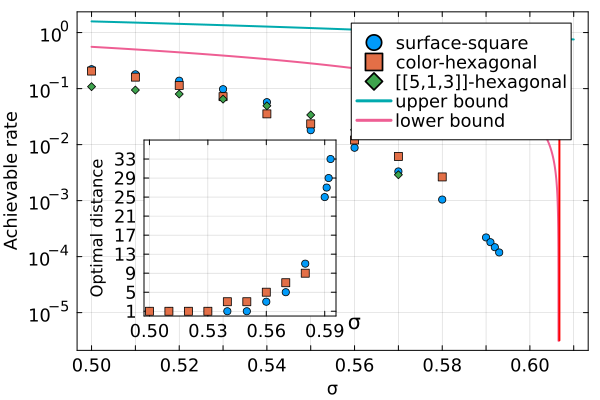

In [33]:
plot!(legend=:topright)
plot!(legend=:false, subplot=2)

In [34]:
savefig("plots/fig_1_has_legend.pdf") ;

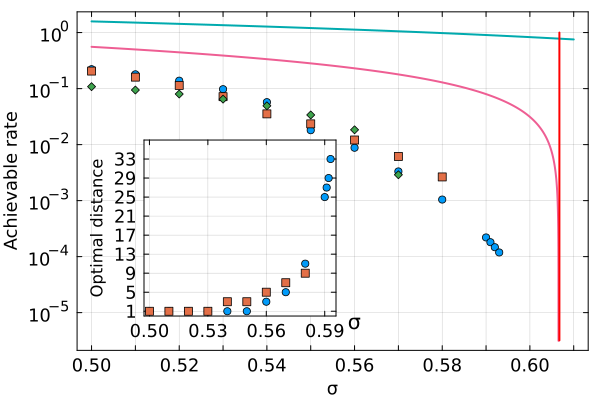

In [35]:
plot!(legend=false)

In [36]:
savefig("plots/fig_1_no_legend.pdf") ;

# Fig 2

In [37]:
function get_p0list_sorted(p_list, drange, σrange)
    p0list_sorted = sort(p_list)
    p0list_sorted = collect(values(p0list_sorted))
    p0list_sorted = reshape(p0list_sorted, (length(drange), length(σrange)))
    p0list_sorted = [p0list_sorted[:,i] for i in 1:size(p0list_sorted,2)]
    return p0list_sorted
end


crossing(x1, x2, y1,y2, y3,y4) = (x2/(x2-x1) * (y4-y1-y3+y2)+y1-y2) / ((y4-y1-y3+y2)/(x2-x1))

function get_crossing(sorted_p0list, d_ind, σrange)
    diff = [item[d_ind] for item in sorted_p0list] - [item[d_ind+1] for item in sorted_p0list]
    ind_1st_positive = findfirst(x->x>0, diff)
    
    σ1 = σrange[ind_1st_positive-1]
    σ2 = σrange[ind_1st_positive]    
    y1 = sorted_p0list[ind_1st_positive][d_ind+1]
    y2 = sorted_p0list[ind_1st_positive][d_ind]
    y3 = sorted_p0list[ind_1st_positive-1][d_ind]
    y4 = sorted_p0list[ind_1st_positive-1][d_ind+1]    
    
    return crossing(σ1, σ2, y1, y2, y3, y4)
end

get_crossing (generic function with 1 method)

In [38]:
cpd_3_29 = load("data/cpd_surface_square_3_29_0.596_0.607_1.0e7.jld2");

In [42]:
dmin = 3
dmax = 23
drange = dmin : 2 : dmax
σrange = cpd_3_29["σrange"]

p_list_cpd = cpd_3_29["p0list_exact"]
sorted_p_list_cpd = collect(values(sort(p_list_cpd)))

# p_list_bsv = bsv_3_23["p_list"]
p_list_bsv = Dict()
for d in drange
    for σ in σrange
        p_list_bsv[[σ, d]] = data_surf_sq["p_list"][[σ, d]]
    end
end
sorted_p_list_bsv = get_p0list_sorted(p_list_bsv, drange, σrange)

linecolors = get_color_palette(:auto, plot_color(:white))

plot()

for ind_d in 1 : length(drange)
    # ind_d == 1 && continue # exclude d=3
    ind_d ∈ [1,3,5,7,9] && continue # exclude d=3,7,11,15,19
    println(drange[ind_d])
    plot!(σrange, [item[ind_d] for item in sorted_p_list_cpd], marker=:circle, linestyle =:dash, color=linecolors[ind_d], 
        label="d=$(drange[ind_d]), Exact MLD, CPD")
    plot!(σrange, [item[ind_d] for item in sorted_p_list_bsv].^2, marker=:square, color=linecolors[ind_d], label="")
end

plot!(xlabel="σ", 
    ylabel="Fidelity", 
    xticks=(round.(σrange, digits=3), ["0.596", "", "0.598", "", "0.600", "", "0.602", "", "0.604", "", "0.606", ""]),
    # grid=false,
    tickfontsize=12,
    # xrotation = 20,
    labelfontsize=12,
    framestyle = :box,
    legendfontsize=12,
)

crossings_cpd = [get_crossing(sorted_p_list_cpd, d_ind, σrange) for d_ind in 1 : length(dmin:2:dmax)-1]
crossings_bsv = [get_crossing(sorted_p_list_bsv, d_ind, σrange) for d_ind in 1 : length(dmin:2:dmax)-1] ;


plot!(subplot=2,
    inset = bbox(0.03, 0.06, 0.3, 0.25, :top, :right),
    # grid = false,
    legend=false,
    tickfontsize=12,    
    labelfontsize=12,
    ylabel="σ",
    xlabel="d",
    ylim=[0.597, 0.608],
    xticks=dmin:4:(dmax-2),
    framestyle = :box
)

plot!((dmin:2:dmax)[1:end-1], 
    crossings_cpd, 
    marker=:circle,
    linestyle =:dash,
    subplot = 2
)

plot!((dmin:2:dmax)[1:end-1], 
    crossings_bsv, 
    marker=:square,
    subplot = 2
)

plot!([3, dmax-1], [exp(-1/2), exp(-1/2)], subplot = 2, color=:red, linewidth=3)

println(crossings_cpd)
println(crossings_bsv)

5
9
13
17
21
23
[0.5986861145110838, 0.6005174147217235, 0.6009645306472353, 0.602112656823419, 0.6017591025641025, 0.6023515503875969, 0.601890942985863, 0.6023455657492354, 0.602606201941258, 0.6019447359607011]
[0.6029411447084232, 0.604040557667934, 0.6048069997463856, 0.6055294044044043, 0.6053437892095358, 0.6060981753272511, 0.6062607142857153, 0.6069227378791804, 0.6060641956438672, 0.606329221366091]


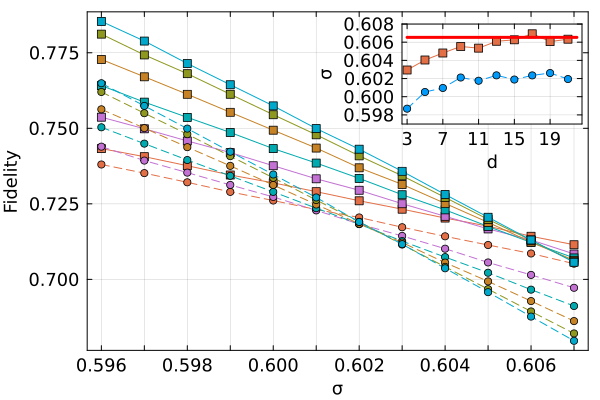

In [43]:
plot!(legend=false)

In [44]:
savefig("plots/fig_2a_no_legend.pdf") ;

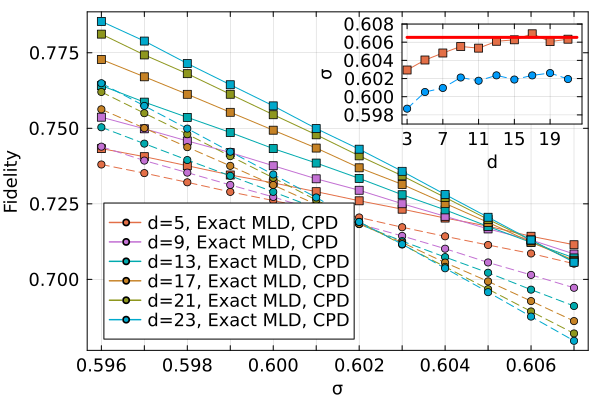

In [45]:
plot!(legend=:bottomleft)
plot!(legend=false, subplot=2)

In [46]:
savefig("plots/fig_2a_has_legend.pdf") ;

In [47]:
σrange_threshold = [0.606, exp(-1/2), 0.607]
drange_threshold = data_surf_sq["drange"][2:end] # exclude d = 1
p_list_threshold = Dict()
for d in drange_threshold
    for σ in σrange_threshold
        p_list_threshold[[σ, d]] = data_surf_sq["p_list"][[σ, d]]
    end
end

sorted_p_list_threshold = get_p0list_sorted(
    p_list_threshold,
    drange_threshold,
    σrange_threshold,
)

plot()
num_samples = 1e7
for (ind, σ) in enumerate(σrange_threshold)
    ind!=2 ? label="σ=$σ" : label="σ=1/√e≈0.6065"

    println("σ = $σ")
    println(sorted_p_list_threshold[ind].^2)
    println()
    fidelity = sorted_p_list_threshold[ind].^2
    yerr = 2 .* sqrt.(fidelity .* (1 .- fidelity) / num_samples)
    plot!(drange_threshold, fidelity, yerr=yerr, marker=:circle, label=label, linewidth=2)
end

σ = 0.606
[0.7174665109893961, 0.7142618818475609, 0.7134140532879866, 0.7130386965639965, 0.7124038712583283, 0.7122273654665092, 0.7123108908162824, 0.7123232091105227, 0.7129238973208676, 0.7129522586272073, 0.7130376385000764, 0.7135994524892532, 0.7135034907380026, 0.713849084452102, 0.714210272992031, 0.714494136739803, 0.7145633863629323, 0.7147175303382922, 0.7148638825167793]

σ = 0.6065306597126334
[0.7159243410691051, 0.7127440214524672, 0.7111788634419325, 0.7105521018681251, 0.7100948094882956, 0.7095273177350689, 0.7094216963066785, 0.7091476563198282, 0.7092918281032465, 0.7093701518614958, 0.7094902827987078, 0.7092392978938824, 0.7091248809360696, 0.7094739396970263, 0.7093070614388253, 0.7094000426578225, 0.7094426229523773, 0.709152504399512, 0.7092728740988792]

σ = 0.607
[0.7144895079033063, 0.7114654018047878, 0.7097614440452391, 0.7084074896111618, 0.7074117901549436, 0.7071091314035367, 0.7063448701822087, 0.7063100873901674, 0.70626001511619, 0.7058485823506406

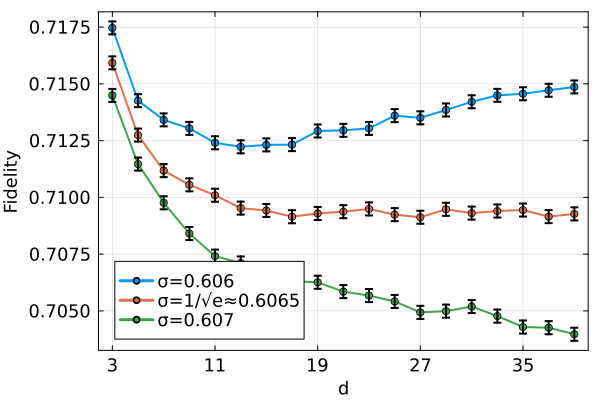

In [48]:
plot!(xlabel="d", 
    ylabel="Fidelity", 
    xticks=drange_threshold[1:4:end],
    # grid=false,
    tickfontsize=12,
    labelfontsize=12,
    legendfontsize=12,
    framestyle = :box,
    # legendposition=:topleft
    # ylim=[0.701,0.719]
)
plot!(legendfontsize=12)

In [49]:
savefig("plots/fig_2b_has_legend.pdf") ;

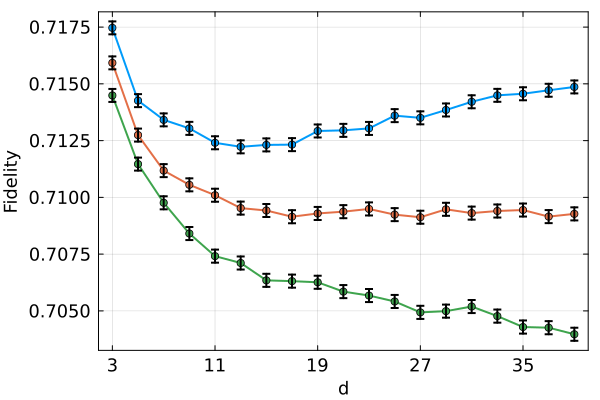

In [50]:
plot!(legend=false)

In [51]:
savefig("plots/fig_2b_no_legend.pdf") ;

# Fig 3

In [53]:
dmin = 3
dmax = 13
drange = dmin : 2 : dmax
σrange = 0.602:0.001:0.607

p_list_surf_sq = Dict()
p_list_color_hex = Dict()
for d in drange
    for σ in σrange
        p_list_surf_sq[[σ, d]] = data_surf_sq["p_list"][[σ, d]]
        p_list_color_hex[[σ, d]] = data_color_hex["p_list"][[σ, d]][1]
    end
end

sorted_p_list_surf_sq = get_p0list_sorted(
    p_list_surf_sq, 
    drange, 
    σrange
)

sorted_p_list_color_hex = get_p0list_sorted(
    p_list_color_hex, 
    drange, 
    σrange
)

plot()

for ind_d in 1 : length(drange)
    plot!(σrange, 
        [item[ind_d] for item in sorted_p_list_surf_sq].^2, 
        marker=:square, 
        linestyle=:dash, 
        color=linecolors[ind_d],
        label="surf-square w/ exact MLD",
    )
    plot!(σrange, 
        [item[ind_d] for item in sorted_p_list_color_hex], 
        marker=:star, 
        color=linecolors[ind_d],
        label="color-hexagonal w/ approx. MLD"
    )
end



plot!(xlabel="σ", 
    ylabel="Fidelity", 
    # legend=false,
    legend=:bottomleft,
    legendfontsize=12,
    xticks=round.(σrange, digits=3),
    ylim=[0.695, 0.755],
    # grid=false,
    tickfontsize=12,
    # xrotation = 20,
    labelfontsize=12,
    framestyle = :box
)


crossings_bsv = [get_crossing(sorted_p_list_surf_sq, d_ind, σrange) for d_ind in 1 : length(dmin:2:dmax)-1] ;
crossings_color_hex = [get_crossing(sorted_p_list_color_hex, d_ind, σrange) for d_ind in 1 : length(dmin:2:dmax)-1] ;

plot!(subplot=2, inset = bbox(0.03, 0.06, 0.3, 0.25, :top, :right))


plot!(subplot = 2,
    # grid = false,
    legend=false,
    ylim=[0.602, 0.608],
    tickfontsize=12,
    labelfontsize=12,
    xticks=dmin:2:(dmax-2),
    ylabel="σ",
    xlabel="d",
    framestyle = :box
)

plot!((dmin:2:dmax)[1:end-1], 
    crossings_bsv, 
    marker=:square,
    subplot = 2,
    linestyle =:dash,
)

plot!((dmin:2:dmax)[1:end-1], 
    crossings_color_hex, 
    marker=:star,
    subplot = 2,
)

plot!([3, dmax-1], [exp(-1/2), exp(-1/2)], subplot = 2, color=:red, linewidth=3)


println(crossings_bsv)
println(crossings_color_hex)

[0.6029411447084232, 0.604040557667934, 0.6048069997463856, 0.6055294044044043, 0.6053437892095358]
[0.6060032381322454, 0.6052315459907452, 0.6054461254185179, 0.6053462063037436, 0.6053843260236499]


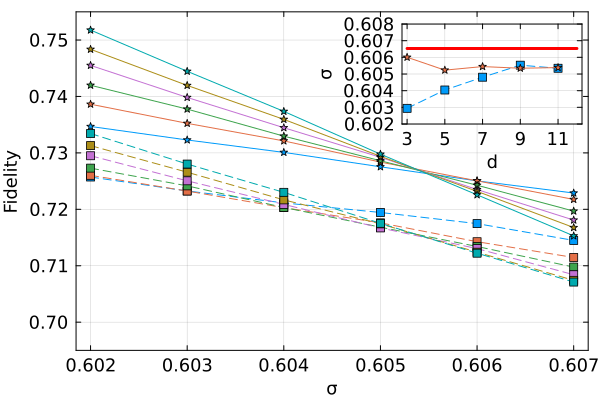

In [54]:
plot!(legend=false)

In [55]:
savefig("plots/fig_3_no_legend.pdf") ;

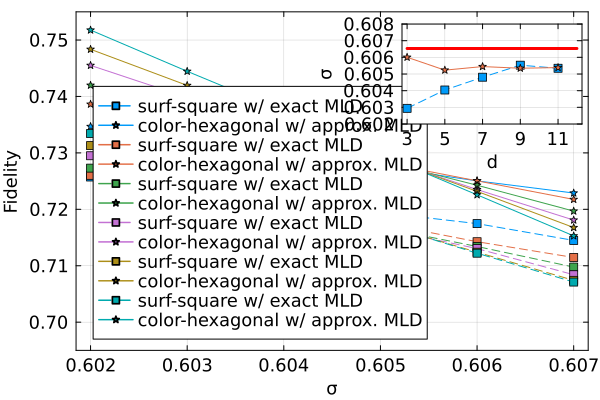

In [56]:
plot!(legend=:bottomleft)
plot!(legend=false, subplot=2)

In [57]:
savefig("plots/fig_3_has_legend.pdf") ;

# Fig 4

[0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.591, 0.592, 0.593, 0.594, 0.595, 0.596, 0.597, 0.598, 0.599, 0.6, 0.601, 0.602, 0.603, 0.604, 0.605, 0.606, 0.607, 0.6065306597126334]
surface-square
Any[0.22202552223795025, 0.17992341102313536, 0.13846831804392923, 0.09759096533062728, 0.05726154518666782, 0.01806829740191751, 0.008788998911356736, 0.003318090867157464, 0.0010443530724502507, 0.00021994128552893456, 0.00018082879058011614, 0.00014717556888680514, 0.00011866664630883545, 9.339244326937536e-5, 7.208747525828881e-5, 4.820947727176286e-5, 2.8609841930765434e-5, 4.23659797071962e-6, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
color-square
Any[0.22202552223795025, 0.17992341102313536, 0.13846831804392923, 0.09759096533062728, 0.05726154518666782, 0.018325046546570727, 0.008751673282328171, 0.004022378465013872, 0.0015056599465056479, 0.0003688138576359333, 0.00029110327640033363, 0.00021594839916760385, 0.00014119532332340594, 6.522856336510441e-5, NaN, Na

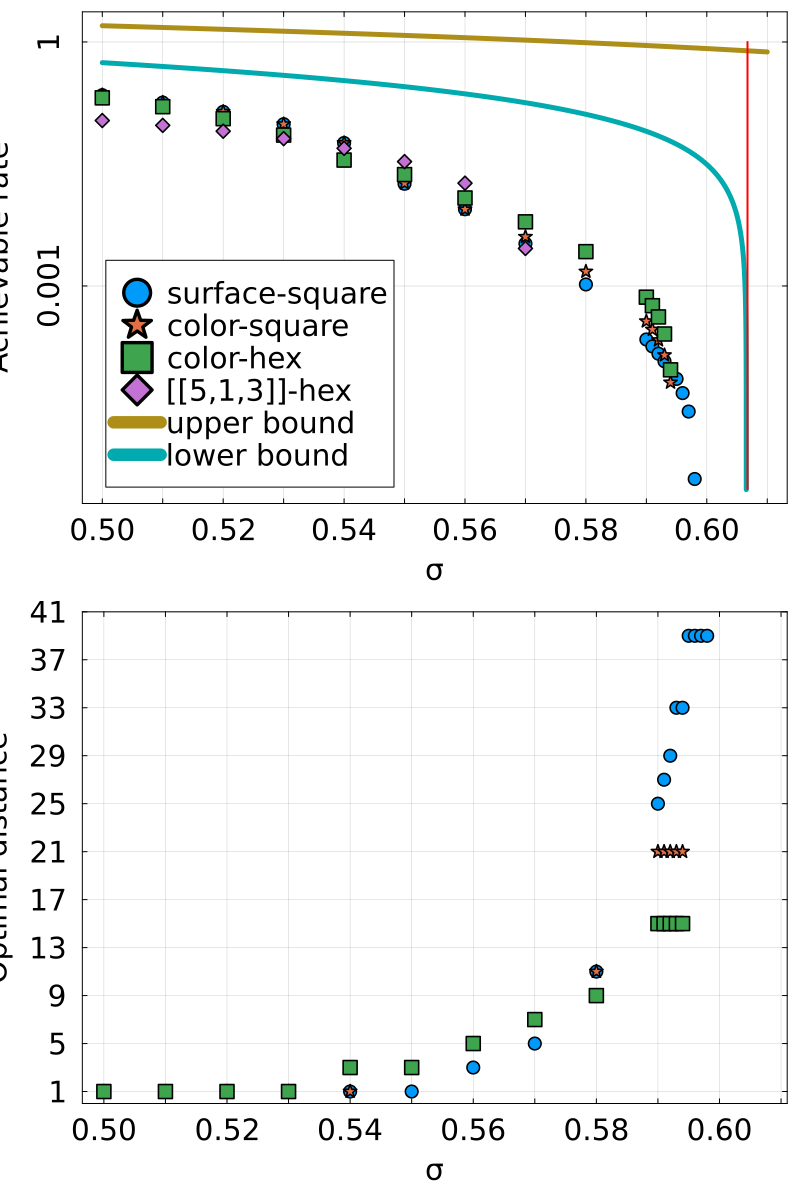

In [60]:
g1 = plot()

linecolors = get_color_palette(:auto, plot_color(:white))
linewidth = 5
fontsize = 20
height = 1200
width=800
markersize = 7
xrotation = 40


σrange_surf_sq = data_surf_sq["σrange"]
σrange_color_hex = data_color_hex["σrange"]
σrange_513_hex = data_513_hex["σrange"]
σrange_color_square = data_color_square["σrange"]

@assert σrange_surf_sq == σrange_color_square
@assert σrange_surf_sq == σrange_color_hex

println(σrange_surf_sq)

println("surface-square")
println(collect(values(sort(cs_surf_sq))))
plot!(σrange_surf_sq, 
    collect(values(sort(cs_surf_sq))),
    seriestype=:scatter, label="surface-square", marker=:circle, markersize=markersize,
)

println("color-square")
println(collect(values(sort(cs_color_square))))
plot!(σrange_color_square,
    collect(values(sort(cs_color_square))),
    seriestype=:scatter, label="color-square", marker=:star, markersize=markersize,
)

println("color-hex")
println(collect(values(sort(cs_color_hex))))
plot!(σrange_color_hex,
    collect(values(sort(cs_color_hex))), 
    seriestype=:scatter, label="color-hex", marker=:square, markersize=markersize,
)

println("513-hex")
println(collect(values(sort(cs_513_hex))))
plot!(σrange_513_hex,
    collect(values(sort(cs_513_hex))), 
    seriestype=:scatter, label="[[5,1,3]]-hex", marker=:diamond, markersize=markersize,
)

# Upper and lower bound
σrange2 = 0.5:0.00001:0.61
plot!(σrange2, check_if_nan.(log2.((1 .- σrange2.^2) ./ (σrange2.^2))), label="upper bound", linewidth=linewidth)
plot!(σrange2, check_if_nan.(log2.( 1 ./ (exp(1) * σrange2.^2))), label="lower bound", linewidth=linewidth)


ϵϵ = 0.0001 * 2
plot!([exp(-1/2)+ϵϵ, exp(-1/2)+ϵϵ], [1, 3.2e-6], color=:red, linewidth=2, label="")

plot!(xlabel="σ", 
    ylabel="Achievable rate", 
    yaxis=:log,
    # grid=false,
    tickfontsize=fontsize,
    labelfontsize=fontsize,    
    xticks=(0.50:0.01:0.61, ["0.50", "", "0.52", "", "0.54", "", "0.56", "", "0.58", "", "0.60", ""]),
    legend=:bottomleft,
    legendfontsize=fontsize,
    # xrotation=xrotation,
    yticks=([1, 0.001], ["1", "0.001"]),
    yrotation=90,
    frame=:box
)

g2 = plot()

plot!(σrange_surf_sq, 
    collect(values(sort(ds_surf_sq))),
    seriestype=:scatter, 
    marker=:circle, 
    markersize=markersize,    
)

plot!(σrange_color_square,
    collect(values(sort(ds_color_square))),
    seriestype=:scatter, 
    marker=:star, 
    markersize=markersize,    
)

plot!(σrange_color_hex,
    collect(values(sort(ds_color_hex))),
    seriestype=:scatter, 
    marker=:square, 
    markersize=markersize,    
)

plot!(
    xlabel="σ", 
    ylabel="Optimal distance", 
    legend=false,
    tickfontsize=fontsize,
    labelfontsize=fontsize,
    ylim = [0, 41],
    xlim = [0.4965, 0.611],
    yticks = [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41],
    xticks=(0.50:0.01:0.61, ["0.50", "", "0.52", "", "0.54", "", "0.56", "", "0.58", "", "0.60", ""]),
    # xrotation=xrotation,
    frame=:box
)

plot(g1, g2, layout=(2,1), size=(width,height))


In [61]:
savefig("plots/fig_4.pdf") ; # need to postprocess the figures to see the y labels

# Fig 5

3
5
7
9
11
13
15
17
19
21
23
[0.5986861145110838, 0.6005174147217235, 0.6009645306472353, 0.602112656823419, 0.6017591025641025, 0.6023515503875969, 0.601890942985863, 0.6023455657492354, 0.602606201941258, 0.6019447359607011]
[0.6029411447084232, 0.604040557667934, 0.6048069997463856, 0.6055294044044043, 0.6053437892095358, 0.6060981753272511, 0.6062607142857153, 0.6069227378791804, 0.6060641956438672, 0.606329221366091]


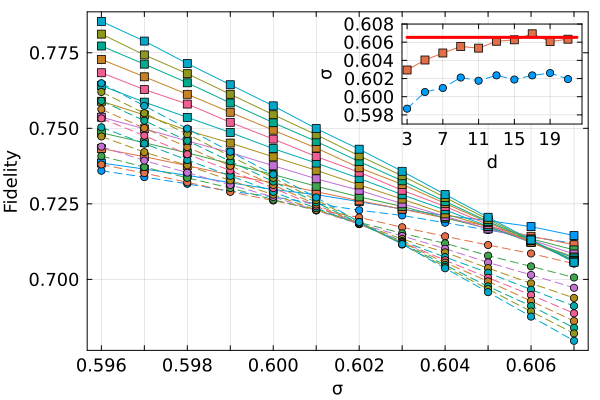

In [63]:
dmin = 3
dmax = 23
drange = dmin : 2 : dmax
σrange = cpd_3_29["σrange"]

p_list_cpd = cpd_3_29["p0list_exact"]
sorted_p_list_cpd = collect(values(sort(p_list_cpd)))

# p_list_bsv = bsv_3_23["p_list"]
p_list_bsv = Dict()
for d in drange
    for σ in σrange
        p_list_bsv[[σ, d]] = data_surf_sq["p_list"][[σ, d]]
    end
end
sorted_p_list_bsv = get_p0list_sorted(p_list_bsv, drange, σrange)

linecolors = get_color_palette(:auto, plot_color(:white))

plot()

for ind_d in 1 : length(drange)
    # ind_d == 1 && continue # exclude d=3
    # ind_d ∈ [1,3,5,7,9] && continue # exclude d=3,7,11,15,19
    println(drange[ind_d])
    plot!(σrange, [item[ind_d] for item in sorted_p_list_cpd], marker=:circle, linestyle =:dash, color=linecolors[ind_d], 
        label="d=$(drange[ind_d]), Exact MLD, CPD")
    plot!(σrange, [item[ind_d] for item in sorted_p_list_bsv].^2, marker=:square, color=linecolors[ind_d], label="")
end

plot!(xlabel="σ", 
    ylabel="Fidelity", 
    xticks=(round.(σrange, digits=3), ["0.596", "", "0.598", "", "0.600", "", "0.602", "", "0.604", "", "0.606", ""]),
    # grid=false,
    tickfontsize=12,
    # xrotation = 20,
    labelfontsize=12,
    framestyle = :box,
    legendfontsize=12,
    legend=false
)

crossings_cpd = [get_crossing(sorted_p_list_cpd, d_ind, σrange) for d_ind in 1 : length(dmin:2:dmax)-1]
crossings_bsv = [get_crossing(sorted_p_list_bsv, d_ind, σrange) for d_ind in 1 : length(dmin:2:dmax)-1] ;


println(crossings_cpd)
println(crossings_bsv)

plot!(subplot=2,
    inset = bbox(0.03, 0.06, 0.3, 0.25, :top, :right),
    # grid = false,
    legend=false,
    tickfontsize=12,    
    labelfontsize=12,
    ylabel="σ",
    xlabel="d",
    ylim=[0.597, 0.608],
    xticks=dmin:4:(dmax-2),
    framestyle = :box
)

plot!((dmin:2:dmax)[1:end-1], 
    crossings_cpd, 
    marker=:circle,
    linestyle =:dash,
    subplot = 2
)

plot!((dmin:2:dmax)[1:end-1], 
    crossings_bsv, 
    marker=:square,
    subplot = 2
)

plot!([3, dmax-1], [exp(-1/2), exp(-1/2)], subplot = 2, color=:red, linewidth=3)


In [64]:
savefig("plots/fig_5.pdf") ;